<a href="https://colab.research.google.com/github/manasa-rajesh/Traffic_sign_Classification/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manasar08","key":"9d1063edaf0efb7e90461f01bed024df"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!mkdir traffic_sign_dataset

In [7]:
%cd traffic_sign_dataset/

/content/traffic_sign_dataset


In [8]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          39640  
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           6546  
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            216  
valentynsichkar/preprocessed-light-version-of-traffic-signs        Pre-processed Light version of Traffic Signs         8GB  2021-04-10 13:35:24             20  
valentynsichkar/traffic-sign

In [9]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:04<00:00, 151MB/s]
100% 612M/612M [00:04<00:00, 157MB/s]


In [10]:
!unzip /content/traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [11]:
!rm /content/traffic_sign_dataset/gtsrb-german-traffic-sign.zip

In [12]:
!rm -rf /content/traffic_sign_dataset/traffic_sign_dataset/Meta

In [13]:
!rm -rf /content/traffic_sign_dataset/traffic_sign_dataset/meta

In [14]:
!rm -rf /content/traffic_sign_dataset/traffic_sign_dataset/test

In [15]:
!rm -rf /content/traffic_sign_dataset/traffic_sign_dataset/train

In [16]:
!rm /content/traffic_sign_dataset/traffic_sign_dataset/Meta.csv

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

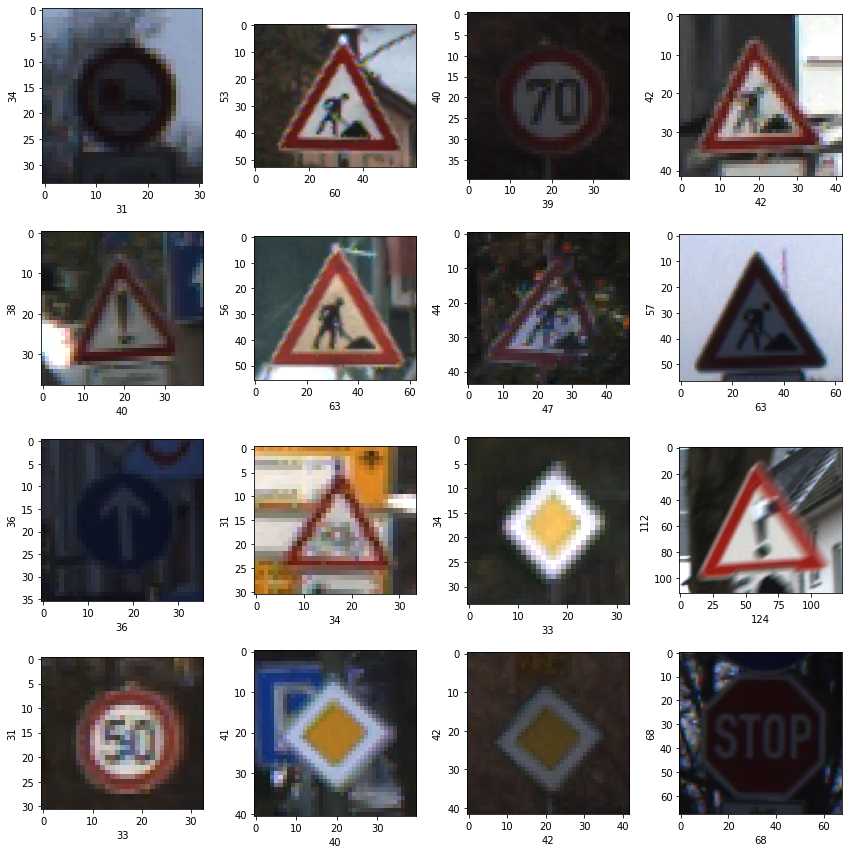

In [18]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [19]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [20]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [21]:
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [22]:
images = np.array(images)

In [23]:
images = images/255

In [24]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [25]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [26]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [27]:
# one-hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [28]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [29]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [31]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 37s - loss: 2.4807 - accuracy: 0.3194 - val_loss: 1.3261 - val_accuracy: 0.6492
Epoch 2/10
246/246 - 6s - loss: 1.1897 - accuracy: 0.6259 - val_loss: 0.5232 - val_accuracy: 0.8897
Epoch 3/10
246/246 - 6s - loss: 0.7375 - accuracy: 0.7646 - val_loss: 0.2916 - val_accuracy: 0.9499
Epoch 4/10
246/246 - 6s - loss: 0.5620 - accuracy: 0.8171 - val_loss: 0.2160 - val_accuracy: 0.9579
Epoch 5/10
246/246 - 6s - loss: 0.4619 - accuracy: 0.8541 - val_loss: 0.1545 - val_accuracy: 0.9722
Epoch 6/10
246/246 - 6s - loss: 0.3991 - accuracy: 0.8713 - val_loss: 0.1240 - val_accuracy: 0.9816
Epoch 7/10
246/246 - 6s - loss: 0.3486 - accuracy: 0.8889 - val_loss: 0.0897 - val_accuracy: 0.9834
Epoch 8/10
246/246 - 6s - loss: 0.3272 - accuracy: 0.8946 - val_loss: 0.0801 - val_accuracy: 0.9872
Epoch 9/10
246/246 - 6s - loss: 0.2877 - accuracy: 0.9078 - val_loss: 0.0736 - val_accuracy: 0.9874
Epoch 10/10
246/246 - 6s - loss: 0.2708 - accuracy: 0.9131 - val_loss: 0.0607 - val_accuracy: 0.988

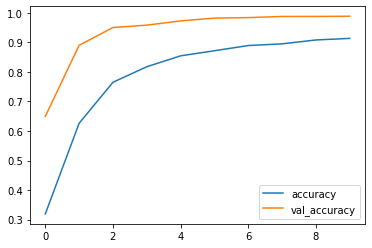

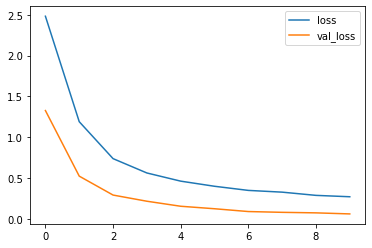

In [32]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [33]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [34]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [63]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)
test_images = np.array(test_images)

In [64]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [72]:
y_pred = model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([16,  1, 38, ..., 38,  7, 10])

In [73]:

# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

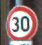

In [74]:
img = Image.open(test_path + '/00001.png')
img

In [75]:
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [76]:
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)
